# Redes Bayesianas



- Para que o código funcione é preciso ter o train.csv obtido pelo Kaggle https://www.kaggle.com/c/titanic/data?select=train.csv.

In [2]:
import pandas as pd

df = pd.read_csv('train.csv')

# Verificando as primeiras linhas do DataFrame
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
# Contando valores nulos em cada coluna
nulos_por_coluna = df.isnull().sum()

# Exibindo a contagem de valores nulos
print(nulos_por_coluna)

total_registros = df.shape[0]
print("Total de registros:", total_registros)

print(df.describe())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Total de registros: 891
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std     

## Tratando os valores faltantes:

- Agora iremos fazer o tratamento dos valores faltantes:

In [ ]:
# Verificando os valores nulos

total_nulos = df.isnull().sum()

print(total_nulos)

# Filtrando os registros onde 'Age' é nulo
registros_nulos_age = df['Age'].isnull()

# Exibindo os registros com valores nulos na coluna 'Age'
print(df[registros_nulos_age])

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
     PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3     

- Com o código acima podemos perceber que Age e Embarked possuem valores nulos, logo devemos tratar esses valores.

- Para Age irei preencher com a mediana baseado nos grupos PClass e Sex, pois substituindo pela mediana de Age, acabaria surgindo muitos valores com valores de Age iguais, logo utilizando a mediana de Age para os grupos PClass e Sex, é gerado uma maior variação.

In [ ]:
# Tratando valores nulos de Age

# Preenchendo valores nulos em 'Age' com a mediana baseada nos grupos 'Pclass' e 'Sex'
df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('median'))


- Para Embarked irei substituir os valores faltantes pela moda.

In [ ]:
# Preenchendo valores nulos na coluna 'Embarked' com o valor mais frequente (moda)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Discretizando as variáveis Age, Fare, Ticket, Cabin e Name:

### Discretizando a variável Age:
- Para discretizar a variável Age iremos criar três faixas etárias:

  - Jovens: 0 a 21
  - Adulto: 22 a 55
  - Idoso: > 56






In [ ]:
bins = [0, 12, 21, 55, float('inf')]  # Define os limites das faixas etárias
labels = ['Criança', 'Jovem', 'Adulto', 'Idoso']  # Define os rótulos

# Criando a nova coluna 'Faixa_Etaria' com base nos limites e rótulos
df['Faixa_Etaria'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Verificando as primeiras linhas para confirmar
print(df[['Age', 'Faixa_Etaria']].head())



    Age Faixa_Etaria
0  22.0       Adulto
1  38.0       Adulto
2  26.0       Adulto
3  35.0       Adulto
4  35.0       Adulto


### Discretizando a variável Fare:

- Agora para discretizar a variável Fare iremos utilizar os valores dos quartis obtidos anteriormente, dessa maneira teremos as seguintes categorias:

  - Baixa: Fare <= 7.91 (primeiro quartil)
  - Média: 7.91 < Fare <= 31.00 (entre o primeiro e o terceiro quartil)
  - Alta: Fare > 31.00 (acima do terceiro quartil)

In [ ]:
bins = [-0.1, 7.91, 31.00, float('inf')]  # Começamos de -0.1 para garantir que 0 seja incluído
labels = ['Baixa', 'Média', 'Alta']  # Define os rótulos

# Criando a nova coluna 'Fare_group' com base nos limites e rótulos
df['Grupo_Tarifa'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=True)

# Verificando as primeiras linhas para confirmar
print(df[['Fare', 'Grupo_Tarifa']].head())

df.info()

      Fare Grupo_Tarifa
0   7.2500        Baixa
1  71.2833         Alta
2   7.9250        Média
3  53.1000         Alta
4   8.0500        Média
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    object  
 11  Embarked      891 non-null    object  
 12  Faixa_Etaria  891 non-null    category
 13  Grupo_Tarifa  891 non-null    category
dtypes: category(2), float64(2), int64(5), obje

### Discretizando a variável Ticket:

A variável `Ticket` foi discretizada para capturar características relevantes sobre o tipo de passagem e a probabilidade de o passageiro estar acompanhado. As seguintes categorias foram criadas:

- **Ticket_Prefix**: Refere-se ao prefixo alfanumérico do ticket, que muitas vezes indica o local de compra ou tipo de passagem. Esse prefixo ajuda a identificar passageiros de classes ou companhias diferentes.

- **Ticket_Length**: Representa o comprimento do número do ticket. Tickets mais longos podem indicar diferentes classes ou origens e foram agrupados em categorias para refletir essas variações.

Essas categorias de `Ticket` foram projetadas para capturar nuances na organização social e econômica dos passageiros, permitindo uma análise mais detalhada sobre a influência dessas variáveis na sobrevivência.


In [ ]:
# Discretização de 'Ticket'
# Extrair prefixo do ticket
df['Prefixo_Ticket'] = df['Ticket'].str.extract(r'([A-Za-z]+)', expand=False).fillna('NoPrefix')

# Calculando o comprimento do ticket
df['Tamanho_Ticket'] = df['Ticket'].apply(len)

# Discretizando tamanho_ticket com base nos quartis
df['Categoria_Tamanho_Ticket'] = pd.cut(
    df['Tamanho_Ticket'],
    bins=[0, 5, 6, 7, df['Tamanho_Ticket'].max()],
    labels=['Muito Pequeno', 'Pequeno', 'Médio', 'Grande'],
    include_lowest=True
)

# Exibindo o DataFrame resultante
print(df)

df.describe()

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.112424    0.523008   
std     257.353842    0.486592    0.836071   13.304424    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   21.500000    0.000000   
50%     446.000000    0.000000    3.000000   26.000000    0.000000   
75%     668.500000    1.000000    3.000000   36.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  Tamanho_Ticket  
count  891.000000  891.000000      891.000000  
mean     0.381594   32.204208        6.750842  
std      0.806057   49.693429        2.745515  
min      0.000000    0.000000        3.000000  
25%      0.000000    7.910400        5.000000  
50%      0.000000   14.454200        6.000000  
75%      0.000000   31.000000        7.000000  
max      6.000000  512.329200       18.000000

### Discretização da Variável Cabin:

A variável `Cabin` foi discretizada para capturar informações relevantes sobre a localização e quantidade de cabines associadas ao passageiro. As seguintes categorias foram criadas:

- **Deck**: Refere-se à letra inicial da cabine, que indica o deck em que o passageiro estava localizado. Essa informação é relevante, pois passageiros em decks superiores podem ter tido uma chance maior de acesso aos botes salva-vidas.

- **Cabin_Count**: Representa o número de cabines associadas a cada passageiro. Passageiros com múltiplas cabines, como membros da tripulação ou passageiros de alto status, podem ter tido acesso prioritário aos recursos de resgate.

- **Has_Cabin**: É uma variável binária que indica a presença (1) ou ausência (0) de uma cabine registrada. Passageiros sem informações de cabine geralmente estavam em classes mais baixas, com menor chance de sobrevivência.

Essas categorias permitem uma análise detalhada da variável `Cabin`, capturando a localização e o status social dos passageiros, o que pode influenciar as probabilidades de sobrevivência.


In [ ]:
# Discretização de 'Cabin'
# Extraindo o deck (letra inicial)
df['Deque'] = df['Cabin'].str[0].fillna('Unknown')

# Indicando presença ou ausência de cabine
df['Tem_Cabine'] = df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

### Discretização da Variável Name:

A variável `Name` foi discretizada para extrair informações significativas que podem impactar a análise de sobrevivência, especialmente em relação ao status social e à idade dos passageiros. As seguintes categorias foram criadas:

- **Title**: Extraído dos nomes, o título (`Mr.`, `Mrs.`, `Miss.`, etc.) fornece informações sobre o gênero, idade e status social do passageiro. Por exemplo, `Master` normalmente indica meninos, enquanto `Lady` ou `Countess` indicam mulheres de alta classe. Esses títulos foram agrupados para capturar diferenças de tratamento e prioridades no resgate.

Essa categoria foi criada para capturar nuances relacionadas ao status e idade dos passageiros, permitindo uma análise mais detalhada sobre a influência dessas características na taxa de sobrevivência.


In [ ]:
# Fazendo a extração do nome

# Extrair o título do nome (exemplo para nomes no estilo do Titanic)
df['Titulo'] = df['Name'].str.extract(r'(\b\w+\.)', expand=False)

# Agrupamento de títulos semelhantes
df['Titulo'] = df['Titulo'].replace(['Ms.', 'Mlle.'], 'Miss.')
df['Titulo'] = df['Titulo'].replace(['Mme.'], 'Mrs.')
df['Titulo'] = df['Titulo'].replace(['Capt.', 'Col.', 'Major.', 'Dr.', 'Rev.'], 'Officer')

# Categorizar os títulos
def categorizar_titulo(titulo):
    if titulo in ['Mr.', 'Don.', 'Officer', 'Sir.']:
        return 'Homem Adulto'
    elif titulo in ['Mrs.', 'Miss.', 'Lady.', 'Countess.']:
        return 'Mulher Adulta'
    elif titulo == 'Master.':
        return 'Menino'
    elif titulo in ['Sir.', 'Lady.', 'Countess.', 'Jonkheer.']:
        return 'Nobreza'
    else:
        return 'Outro'

# Aplicar a função de categorização
df['Categoria_Titulo_Name'] = df['Titulo'].apply(categorizar_titulo)

# Exibir as categorias resultantes
print(df[['Name', 'Titulo', 'Categoria_Titulo_Name']])

df.head()

                                                  Name   Titulo  \
0                              Braund, Mr. Owen Harris      Mr.   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs.   
2                               Heikkinen, Miss. Laina    Miss.   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs.   
4                             Allen, Mr. William Henry      Mr.   
..                                                 ...      ...   
886                              Montvila, Rev. Juozas  Officer   
887                       Graham, Miss. Margaret Edith    Miss.   
888           Johnston, Miss. Catherine Helen "Carrie"    Miss.   
889                              Behr, Mr. Karl Howell      Mr.   
890                                Dooley, Mr. Patrick      Mr.   

    Categoria_Titulo_Name  
0            Homem Adulto  
1           Mulher Adulta  
2           Mulher Adulta  
3           Mulher Adulta  
4            Homem Adulto  
..                    ...  

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  ... Embarked Faixa_Etaria Grupo_Tarifa  \
0      0         A/5 21171   7.2500  ...        S       Adulto        Baixa   
1      0          PC 17599  71.2833  ...        C       Adulto         Alta   
2      0  STON/O2. 3101282   7.9250  ...        S       Adulto        Média   
3      0            113803  53.1000  ...        S       Adulto         Alta   
4      0            373450   8.0500  ...        S       Adulto        Média   

  Prefixo_Ticket Tamanho_Ticket  Categoria_Tamanho_Ticket    Deque Tem_Cabine  \
0              A              9                    Grande  Unknown          0   
1             PC              8                    Grande        C          1   
2           STON             16                    Grande  Unknown          0   
3       NoPrefix              6                   Pequeno        C          1   
4       NoPrefix              6                   Pequeno  Unknown          0   

   Titulo Categoria_Titulo_Name  
0     Mr.          Homem Adulto  
1    Mrs.         Mulher Adulta  
2   Miss.         Mulher Adulta  
3    Mrs.         Mulher Adulta  
4     Mr.          Homem Adulto  

[5 rows x 21 columns]

### Discretizando a variável Prefixo_Ticket

A variável `prefixo_ticket`, extraída do número do ticket, foi categorizada para capturar informações sobre o status social e o tipo de viagem dos passageiros. As seguintes categorias foram criadas:

- **Classe Alta**: Inclui prefixos associados a passageiros de primeira classe e com passagens de alto valor. Prefixos como `PC`, `CA`, `W`, `A`, `C`, e `SCO` indicam, em geral, passageiros de alta classe.

- **Classe Média e Econômica**: Contém prefixos típicos de passagens de classe média e econômica, como `STON`, `SOTON`, `SC`, `S`, e `SO`, que geralmente representam viagens mais acessíveis ou compradas em portos de embarque comuns para passageiros de classe baixa.

- **Grupos e Organizações**: Inclui prefixos de tickets comprados para grupos, organizações ou por companhias para trabalhadores. Prefixos como `LINE`, `Fa`, `SW`, `WE`, e `P` sugerem uma compra em grupo ou um bilhete reservado para grupos específicos.

- **Sem Prefixo ou Indeterminado**: Representa tickets sem prefixo alfanumérico ou com valores indeterminados, como `NoPrefix`. Estes tickets podem indicar passagens econômicas compradas diretamente, sem um código de agência ou grupo associado.

Essas categorias ajudam a capturar nuances sociais e econômicas do embarque, permitindo uma análise mais detalhada da provável influência do tipo de ticket na sobrevivência.




In [ ]:
# Função para categorizar os prefixos
def categorizar_prefixo(prefixo):
    if prefixo in ['PC', 'CA', 'W', 'A', 'C', 'SCO']:
        return 'Classe Alta'
    elif prefixo in ['STON', 'SOTON', 'SC', 'S', 'SO']:
        return 'Classe Média e Econômica'
    elif prefixo in ['LINE', 'Fa', 'SW', 'WE', 'P']:
        return 'Grupos e Organizações'
    else:
        return 'Sem Prefixo ou Indeterminado'

# Aplicar a função de categorização
df['Categoria_Prefixo_Ticket'] = df['Prefixo_Ticket'].apply(categorizar_prefixo)

# Exibir o DataFrame resultante
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

### Discretização da Variável `Deque`

A variável `Deque` representa o deck em que a cabine de um passageiro estava localizada. No conjunto de dados original, essa variável contém valores categóricos indicando o deck (como A, B, C, etc.). Para facilitar a modelagem e a inclusão dessa variável na rede bayesiana, optamos por discretizá-la em grupos que representam a localização aproximada dentro do navio, refletindo a proximidade e o acesso aos recursos de resgate. A discretização foi realizada da seguinte forma:

- **Deck Superior**: Inclui decks A, B e C, onde estão localizadas as cabines de luxo e geralmente mais próximas das saídas e botes salva-vidas.
- **Deck Médio**: Inclui decks D e E, ocupados por passageiros de classes intermediárias.
- **Deck Inferior**: Inclui decks F, G e T, onde estão as cabines de passageiros de terceira classe e áreas de menor acessibilidade.
- **Desconhecido**: Para valores ausentes ou desconhecidos no dataset.

Essa discretização permite simplificar a variável `Deque`, agrupando-a em categorias de localização que representam diferentes níveis de acessibilidade e status social, fatores que podem ter influenciado a probabilidade de sobrevivência.


In [ ]:
# Função para categorizar os decks
def categorizar_deck(deck):
    if deck in ['A', 'B', 'C']:
        return 'Deck Superior'
    elif deck in ['D', 'E']:
        return 'Deck Médio'
    elif deck in ['F', 'G', 'T']:
        return 'Deck Inferior'
    else:
        return 'Desconhecido'

# Aplicar a função de categorização
df['Categoria_Deque'] = df['Deque'].apply(categorizar_deck)

# Exibir o DataFrame resultante
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

## Eliminando variáveis do dataset:

- Agora que todas as variáveis estão tratadas vamos excluir a variável PassengerId, pois:

  - PassengerId é apenas um número sequencial sem correlação direta com atributos do passageiro, como gênero, idade, classe, etc. Ele não fornece informações úteis para prever a variável de interesse Survived.

- Como as variáveis Age, Fare, Ticket, Name e Cabin foram categorizadas e substituidas por Faixa_Etaria, Grupo_Tarifa, Prefixo_Ticket, Tamanho_Ticket, Categoria_Titulo, Deque e Tem_Cabine respectivamente, iremos fazer a exclusão delas:

In [ ]:
df = df.drop(['Age', 'Fare', 'Ticket', 'Cabin', 'Name', 'Titulo', 'PassengerId', 'Tamanho_Ticket', 'Deque', 'Prefixo_Ticket'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Survived                  891 non-null    int64   
 1   Pclass                    891 non-null    int64   
 2   Sex                       891 non-null    object  
 3   SibSp                     891 non-null    int64   
 4   Parch                     891 non-null    int64   
 5   Embarked                  891 non-null    object  
 6   Faixa_Etaria              891 non-null    category
 7   Grupo_Tarifa              891 non-null    category
 8   Categoria_Tamanho_Ticket  891 non-null    category
 9   Tem_Cabine                891 non-null    int64   
 10  Categoria_Titulo_Name     891 non-null    object  
 11  Categoria_Prefixo_Ticket  891 non-null    object  
 12  Categoria_Deque           891 non-null    object  
dtypes: category(3), int64(5), object(5)
memory usage: 

## Utilizando Label Encoder para tornar todas as variáveis como numéricas:

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instanciar o LabelEncoder
label_encoder = LabelEncoder()

# Transformando as colunas com LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instanciar o LabelEncoder
label_encoder = LabelEncoder()

# Codificando a coluna 'Sex' e exibindo o mapeamento
df['Sex'] = label_encoder.fit_transform(df['Sex'])
print("Mapeamento de 'Sex':", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Codificando a coluna 'Embarked' e exibindo o mapeamento
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
print("Mapeamento de 'Embarked':", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Codificando a coluna 'Faixa_Etaria' e exibindo o mapeamento
df['Faixa_Etaria'] = label_encoder.fit_transform(df['Faixa_Etaria'])
print("Mapeamento de 'Faixa_Etaria':", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Codificando a coluna 'Grupo_Tarifa' e exibindo o mapeamento
df['Grupo_Tarifa'] = label_encoder.fit_transform(df['Grupo_Tarifa'])
print("Mapeamento de 'Grupo_Tarifa':", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Codificando a coluna 'Categoria_Tamanho_Ticket' e exibindo o mapeamento
label_encoder = LabelEncoder()
df['Categoria_Tamanho_Ticket'] = label_encoder.fit_transform(df['Categoria_Tamanho_Ticket'])
print("Mapeamento de 'Categoria_Tamanho_Ticket':", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Codificando a coluna 'Categoria_Titulo_Name' e exibindo o mapeamento
label_encoder = LabelEncoder()
df['Categoria_Titulo_Name'] = label_encoder.fit_transform(df['Categoria_Titulo_Name'])
print("Mapeamento de 'Categoria_Titulo_Name':", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Codificando a coluna 'Categoria_Prefixo_Ticket' e exibindo o mapeamento
label_encoder = LabelEncoder()
df['Categoria_Prefixo_Ticket'] = label_encoder.fit_transform(df['Categoria_Prefixo_Ticket'])
print("Mapeamento de 'Categoria_Prefixo_Ticket':", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Codificando a coluna 'Categoria_Deque' e exibindo o mapeamento
label_encoder = LabelEncoder()
df['Categoria_Deque'] = label_encoder.fit_transform(df['Categoria_Deque'])
print("Mapeamento de 'Categoria_Deque':", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


print(df.dtypes)
print(df.head())

df.info()



Mapeamento de 'Sex': {'female': 0, 'male': 1}
Mapeamento de 'Embarked': {'C': 0, 'Q': 1, 'S': 2}
Mapeamento de 'Faixa_Etaria': {'Adulto': 0, 'Criança': 1, 'Idoso': 2, 'Jovem': 3}
Mapeamento de 'Grupo_Tarifa': {'Alta': 0, 'Baixa': 1, 'Média': 2}
Mapeamento de 'Categoria_Tamanho_Ticket': {'Grande': 0, 'Muito Pequeno': 1, 'Médio': 2, 'Pequeno': 3}
Mapeamento de 'Categoria_Titulo_Name': {'Homem Adulto': 0, 'Menino': 1, 'Mulher Adulta': 2, 'Nobreza': 3}
Mapeamento de 'Categoria_Prefixo_Ticket': {'Classe Alta': 0, 'Classe Média e Econômica': 1, 'Grupos e Organizações': 2, 'Sem Prefixo ou Indeterminado': 3}
Mapeamento de 'Categoria_Deque': {'Deck Inferior': 0, 'Deck Médio': 1, 'Deck Superior': 2, 'Desconhecido': 3}
Survived                    int64
Pclass                      int64
Sex                         int64
SibSp                       int64
Parch                       int64
Embarked                    int64
Faixa_Etaria                int64
Grupo_Tarifa                int64
Categoria_

### Mapeamento de Variáveis Categóricas e Numéricas

As variáveis categóricas e numéricas foram codificadas com valores inteiros para facilitar a análise e a modelagem em machine learning. Abaixo estão os mapeamentos para cada uma das variáveis:

- **Survived**: Indica se o passageiro sobreviveu ao desastre.
  - `0`: Não Sobreviveu
  - `1`: Sobreviveu

- **Pclass**: Classe da passagem do passageiro, refletindo o status socioeconômico.
  - `1`: Primeira Classe (alta)
  - `2`: Segunda Classe (média)
  - `3`: Terceira Classe (baixa)

- **Sex**: Representa o gênero dos passageiros.
  - `'female'`: `0`
  - `'male'`: `1`

- **SibSp**: Número de irmãos/esposos a bordo do Titanic com o passageiro.
  - `0`: Nenhum irmão ou esposo(a) a bordo
  - Outros valores indicam o número de irmãos/esposos com o passageiro.

- **Parch**: Número de pais/filhos a bordo do Titanic com o passageiro.
  - `0`: Nenhum pai ou filho a bordo
  - Outros valores indicam o número de pais/filhos com o passageiro.

- **Embarked**: Indica o porto de embarque do passageiro.
  - `'C'` (Cherbourg): `0`
  - `'Q'` (Queenstown): `1`
  - `'S'` (Southampton): `2`

- **Faixa_Etaria**: Representa a faixa etária do passageiro.
  - `'Adulto'`: `0` - Passageiros adultos entre 22 e 55 anos.
  - `'Criança'`: `1` - Passageiros de 0 a 12 anos.
  - `'Idoso'`: `2` - Passageiros acima de 55 anos.
  - `'Jovem'`: `3` - Passageiros entre 13 e 21 anos.

- **Grupo_Tarifa**: Agrupamento de faixas de tarifa pagas pelos passageiros.
  - `'Alta'`: `0` - Tarifa alta.
  - `'Baixa'`: `1` - Tarifa baixa.
  - `'Média'`: `2` - Tarifa média.

- **Categoria_Tamanho_Ticket**: Representa o tamanho do número do ticket em diferentes grupos.
  - `'Grande'`: `0` - Tamanho maior que a média.
  - `'Muito Pequeno'`: `1` - Tamanho bem abaixo da média.
  - `'Médio'`: `2` - Tamanho dentro da média.
  - `'Pequeno'`: `3` - Tamanho abaixo da média.

- **Categoria_Titulo_Name**: Categoria do título extraído do nome, indicando gênero e status social.
  - `'Homem Adulto'`: `0` - Títulos comuns para homens adultos.
  - `'Menino'`: `1` - Títulos comuns para meninos.
  - `'Mulher Adulta'`: `2` - Títulos comuns para mulheres adultas.
  - `'Nobreza'`: `3` - Títulos associados à nobreza, como "Sir" ou "Lady".

- **Categoria_Prefixo_Ticket**: Agrupamento dos prefixos do ticket, refletindo classe social e origem.
  - `'Classe Alta'`: `0` - Prefixos associados à primeira classe.
  - `'Classe Média e Econômica'`: `1` - Prefixos associados à classe média ou econômica.
  - `'Grupos e Organizações'`: `2` - Prefixos indicando grupos ou organizações.
  - `'Sem Prefixo ou Indeterminado'`: `3` - Tickets sem prefixo ou prefixos indeterminados.

- **Categoria_Deque**: Refere-se ao deck da cabine do passageiro, indicando localização no navio.
  - `'Deck Inferior'`: `0` - Decks localizados nas áreas mais baixas do navio (ex: `F`, `G`, `T`).
  - `'Deck Médio'`: `1` - Decks médios (ex: `D`, `E`).
  - `'Deck Superior'`: `2` - Decks superiores, geralmente com cabines de luxo (ex: `A`, `B`, `C`).
  - `'Desconhecido'`: `3` - Sem informação sobre a localização da cabine.

Esses mapeamentos transformam as variáveis categóricas e numéricas, facilitando sua utilização em modelos de machine learning e análises quantitativas, sem perder o significado das categorias originais.


## Criando o modelo e treinando a rede:

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.inference import VariableElimination
from pgmpy.estimators import HillClimbSearch, K2Score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Verificar se a coluna 'Survived' existe em df
if 'Survived' not in df.columns:
    raise ValueError("A coluna 'Survived' não está presente no DataFrame.")

# Inicializar o algoritmo de busca com os dados
search = HillClimbSearch(df)

# Estimar a estrutura usando o K2 Score
modelo = search.estimate(scoring_method=K2Score(df))

# Criar o modelo de rede com a estrutura aprendida
rede_bayesiana = BayesianNetwork(modelo.edges())

# Limitar cada nó a no máximo 3 pais
for node in rede_bayesiana.nodes():
    while len(rede_bayesiana.get_parents(node)) > 3:
        # Remover o último pai adicionado
        rede_bayesiana.remove_edge(rede_bayesiana.get_parents(node)[-1], node)

# Divisão entre recursos (X) e variável alvo (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Juntando X_train e y_train em um DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Ajustar a rede com o MaximumLikelihoodEstimator
rede_bayesiana.fit(train_data, estimator=MaximumLikelihoodEstimator)

print("Estrutura da Rede:", rede_bayesiana.edges())

# Função para verificar e filtrar X_test com base nos estados conhecidos da rede
def filtrar_valores_invalidos(X_test, rede_bayesiana):
    valid_rows = []
    for i, row in X_test.iterrows():
        valido = True
        for cpd in rede_bayesiana.get_cpds():
            variable = cpd.variable
            if variable in row.index and row[variable] not in cpd.state_names[variable]:
                valido = False
                break
        if valido:
            valid_rows.append(i)
    return X_test.loc[valid_rows]

# Aplicar a função para filtrar X_test
X_test_filtered = filtrar_valores_invalidos(X_test, rede_bayesiana)
y_test_filtered = y_test.loc[X_test_filtered.index]  # Filtrar y_test de acordo com X_test filtrado

# Configurar a inferência
inferencia = VariableElimination(rede_bayesiana)

# Lista para armazenar as previsões
y_pred = []

# Iterar sobre cada exemplo em X_test_filtered
for _, row in X_test_filtered.iterrows():
    pred = inferencia.map_query(variables=['Survived'], evidence=row.to_dict())
    y_pred.append(pred['Survived'])

# Calcular a acurácia
accuracy = accuracy_score(y_test_filtered, y_pred)
print("Acurácia:", accuracy)

# Exibir relatório de classificação
print(classification_report(y_test_filtered, y_pred))
# Exibir matriz de confusão
print(confusion_matrix(y_test_filtered, y_pred))


  0%|          | 0/1000000 [00:00<?, ?it/s]

Estrutura da Rede: [('Survived', 'Grupo_Tarifa'), ('Survived', 'SibSp'), ('Survived', 'Faixa_Etaria'), ('Survived', 'Embarked'), ('Survived', 'Pclass'), ('Survived', 'Categoria_Deque'), ('Survived', 'Categoria_Tamanho_Ticket'), ('Survived', 'Categoria_Prefixo_Ticket'), ('Pclass', 'Grupo_Tarifa'), ('Pclass', 'Embarked'), ('Pclass', 'SibSp'), ('Pclass', 'Faixa_Etaria'), ('Pclass', 'Categoria_Tamanho_Ticket'), ('Categoria_Deque', 'Tem_Cabine'), ('Sex', 'Grupo_Tarifa'), ('Sex', 'SibSp'), ('Sex', 'Faixa_Etaria'), ('Sex', 'Embarked'), ('Sex', 'Pclass'), ('Sex', 'Survived'), ('Sex', 'Categoria_Tamanho_Ticket'), ('Sex', 'Categoria_Prefixo_Ticket'), ('Parch', 'Categoria_Titulo_Name'), ('Parch', 'Pclass'), ('Parch', 'Categoria_Prefixo_Ticket'), ('Categoria_Titulo_Name', 'Sex'), ('Categoria_Titulo_Name', 'Survived')]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:489: RuntimeWarning: invalid value encountered in divide
  phi.values = phi.values / phi.values.sum()


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Acurácia: 0.7653631284916201
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       110
           1       0.71      0.65      0.68        69

    accuracy                           0.77       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.77      0.76       179

[[92 18]
 [24 45]]


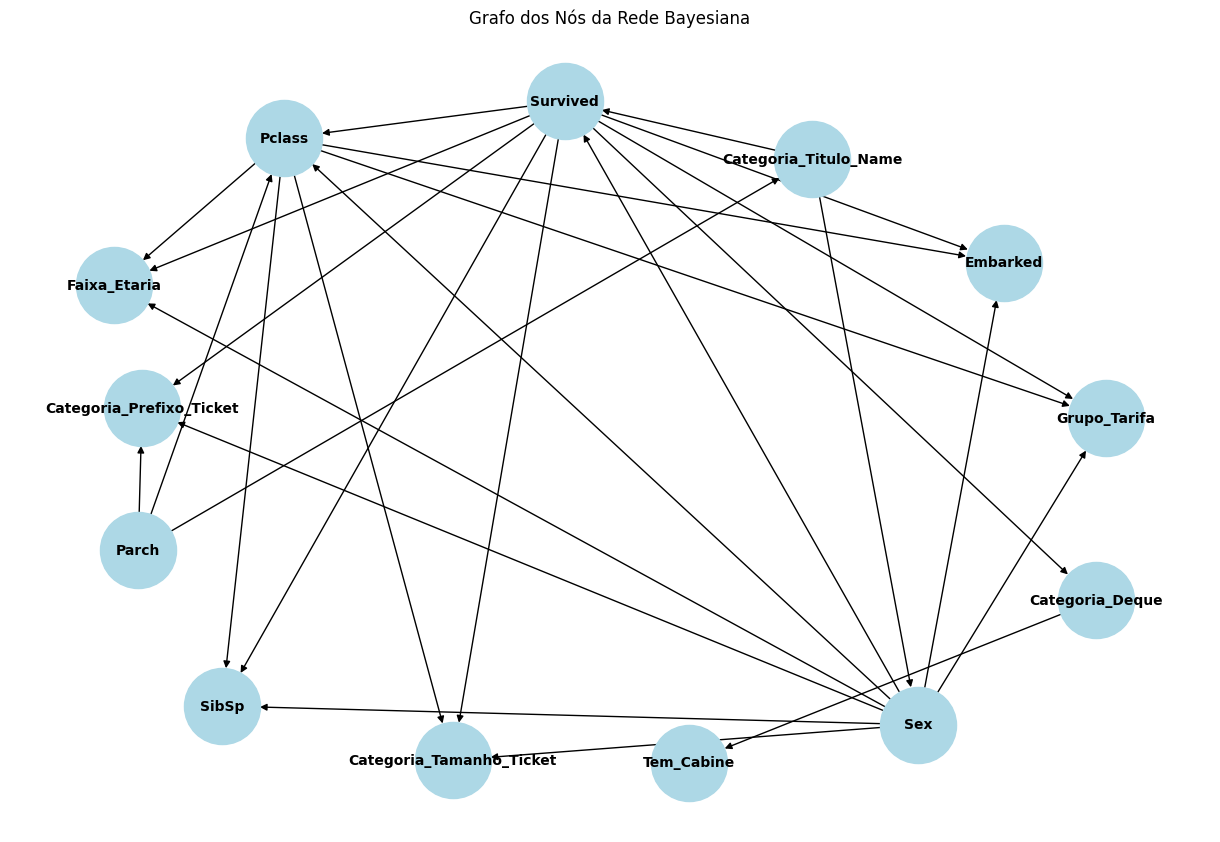

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Converter a Rede Bayesiana para um grafo NetworkX
grafo = nx.DiGraph()
grafo.add_edges_from(rede_bayesiana.edges())

# Desenhar o grafo com maior separação entre os nós
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(grafo, k=4, seed=42)
nx.draw(grafo, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Grafo dos Nós da Rede Bayesiana")
plt.show()


## Plotando o gráfico de barras da probabilidade de sobrevivência por classe social:

Pclass
1    0.649123
2    0.446667
3    0.242967
Name: Survived, dtype: float64


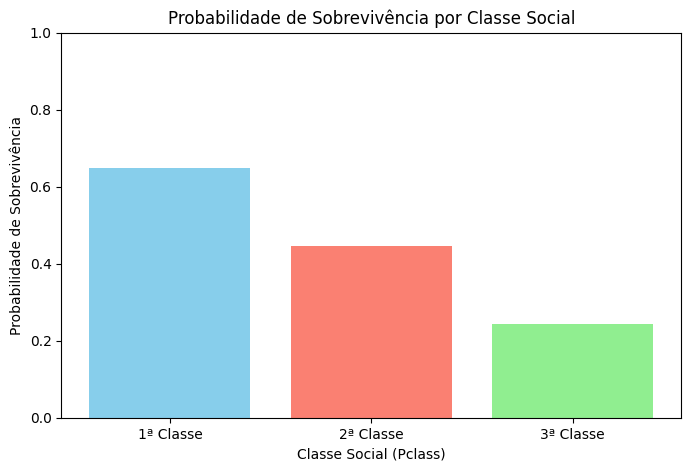

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular a probabilidade de sobrevivência para cada classe social
probabilidade_sobrevivencia_por_classe = train_data.groupby('Pclass')['Survived'].mean()

# Exibir a probabilidade de sobrevivência para cada classe
print(probabilidade_sobrevivencia_por_classe)

# Plotar o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(probabilidade_sobrevivencia_por_classe.index, probabilidade_sobrevivencia_por_classe.values, color=['skyblue', 'salmon', 'lightgreen'])

# Configurações do título e rótulos
plt.title('Probabilidade de Sobrevivência por Classe Social')
plt.xlabel('Classe Social (Pclass)')
plt.ylabel('Probabilidade de Sobrevivência')
plt.xticks([1, 2, 3], ['1ª Classe', '2ª Classe', '3ª Classe'])
plt.ylim(0, 1)

# Mostrar o gráfico
plt.show()


## Plotando o gráfico de barras da probabilidade de sobrevivência por classe social e gênero:

Sex            0         1
Pclass                    
1       0.974684  0.369565
2       0.913793  0.152174
3       0.500000  0.134545


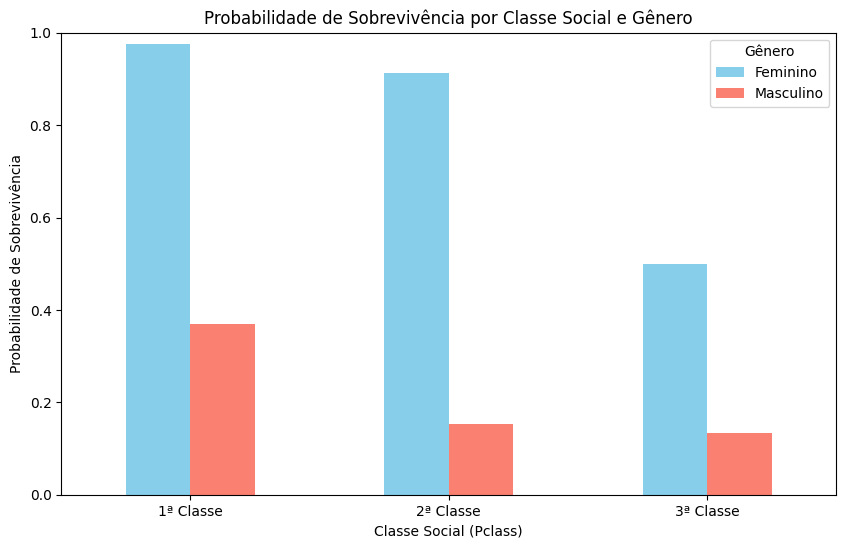

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular a probabilidade de sobrevivência por classe e gênero
prob_sobrevivencia_classe_genero = train_data.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

# Exibir os dados calculados para conferência
print(prob_sobrevivencia_classe_genero)

# Criar o gráfico de barras empilhadas
prob_sobrevivencia_classe_genero.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])

# Configurações do gráfico
plt.title('Probabilidade de Sobrevivência por Classe Social e Gênero')
plt.xlabel('Classe Social (Pclass)')
plt.ylabel('Probabilidade de Sobrevivência')
plt.xticks(ticks=[0, 1, 2], labels=['1ª Classe', '2ª Classe', '3ª Classe'], rotation=0)
plt.ylim(0, 1)
plt.legend(['Feminino', 'Masculino'], title='Gênero')

# Exibir o gráfico
plt.show()


## Plotando o gráfico de barras da probabilidade de sobrevivência por faixa etária:

Faixa_Etaria
0    0.379576
1    0.600000
2    0.206897
3    0.339450
Name: Survived, dtype: float64


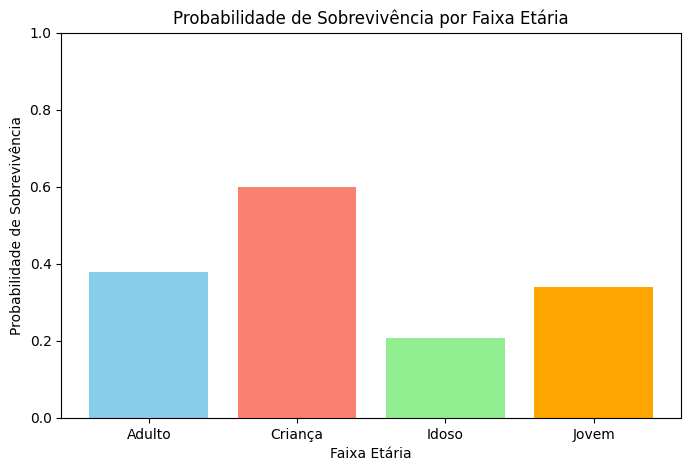

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular a probabilidade de sobrevivência por faixa etária
prob_sobrevivencia_faixa_etaria = train_data.groupby('Faixa_Etaria')['Survived'].mean()

# Exibir os dados calculados para conferência
print(prob_sobrevivencia_faixa_etaria)

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(prob_sobrevivencia_faixa_etaria.index, prob_sobrevivencia_faixa_etaria.values, color=['skyblue', 'salmon', 'lightgreen', 'orange'])

# Configurações do gráfico
plt.title('Probabilidade de Sobrevivência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Probabilidade de Sobrevivência')
plt.xticks([0, 1, 2, 3], ['Adulto', 'Criança', 'Idoso', 'Jovem'], rotation=0)
plt.ylim(0, 1)

# Exibir o gráfico
plt.show()


## Plotando o heatmap da probabilidade condicional de sobrevivência por classe social e gênero:

Sex            0         1
Pclass                    
1       0.974684  0.369565
2       0.913793  0.152174
3       0.500000  0.134545


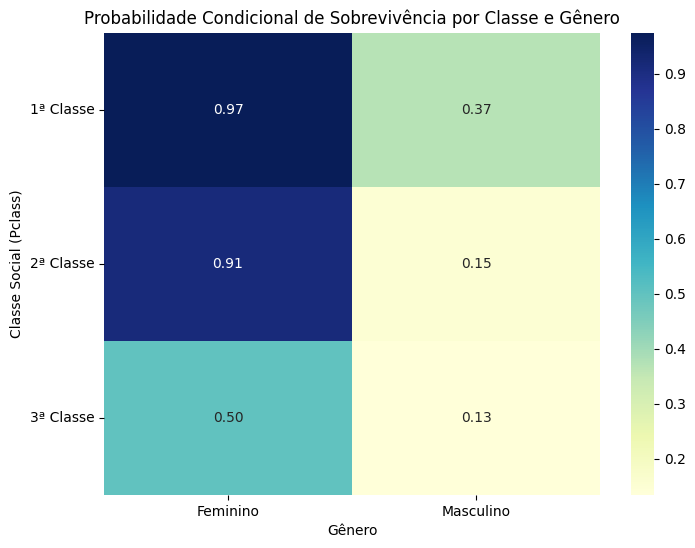

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a probabilidade de sobrevivência por classe e gênero
prob_sobrevivencia_classe_genero = train_data.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

# Exibir os dados calculados para conferência
print(prob_sobrevivencia_classe_genero)

# Criar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(prob_sobrevivencia_classe_genero, annot=True, cmap="YlGnBu", cbar=True, fmt=".2f")

# Configurações do gráfico
plt.title('Probabilidade Condicional de Sobrevivência por Classe e Gênero')
plt.xlabel('Gênero')
plt.ylabel('Classe Social (Pclass)')
plt.xticks([0.5, 1.5], ['Feminino', 'Masculino'], rotation=0)
plt.yticks([0.5, 1.5, 2.5], ['1ª Classe', '2ª Classe', '3ª Classe'], rotation=0)

# Exibir o gráfico
plt.show()


## Plotando o heatmap da taxa de sobrevivência por faixa etária:

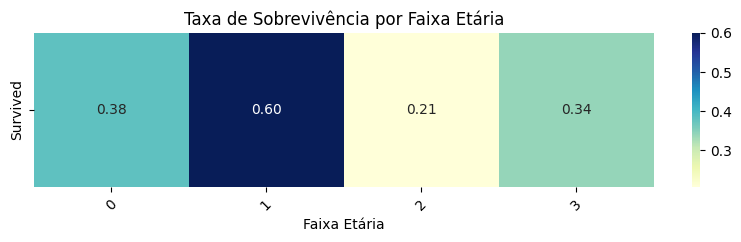

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a probabilidade de sobrevivência por faixa etária
prob_sobrevivencia_faixa_etaria = train_data.groupby('Faixa_Etaria')['Survived'].mean()

# Transformar para DataFrame para visualização do heatmap
heatmap_data = prob_sobrevivencia_faixa_etaria.to_frame().T

# Criar o heatmap
plt.figure(figsize=(10, 2))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar=True, fmt=".2f")

# Configurações do gráfico
plt.title('Taxa de Sobrevivência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('')
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

## Plotando o gráfico de barras da probabilidade de sobrevivência por categoria de título:

Valores únicos em 'Categoria_Titulo_Name': [0 2 1 3]
Valores únicos em 'Categoria_Titulo_Name': [0 2 1 3]
Categoria_Titulo_Name
0    0.161215
1    0.548387
2    0.742063
3    0.000000
Name: Survived, dtype: float64


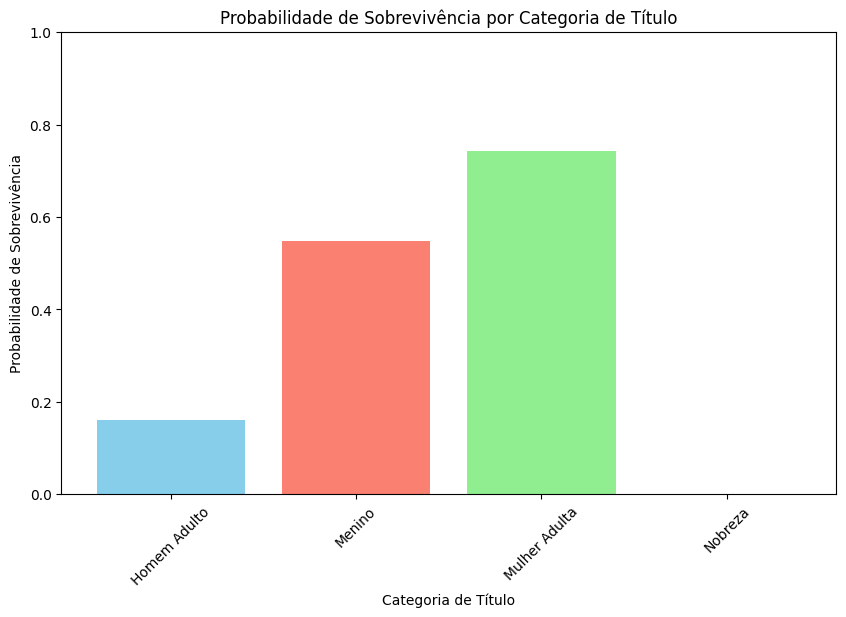

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular a probabilidade de sobrevivência por categoria de título
prob_sobrevivencia_titulo = train_data.groupby('Categoria_Titulo_Name')['Survived'].mean()

valores_unicos_titulo = train_data['Categoria_Titulo_Name'].unique()
print("Valores únicos em 'Categoria_Titulo_Name':", valores_unicos_titulo)

valores_unicos_titulo = train_data['Categoria_Titulo_Name'].unique()
print("Valores únicos em 'Categoria_Titulo_Name':", valores_unicos_titulo)

# Exibir os dados calculados para conferência
print(prob_sobrevivencia_titulo)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(prob_sobrevivencia_titulo.index, prob_sobrevivencia_titulo.values, color=['skyblue', 'salmon', 'lightgreen', 'orange'])

# Configurações do gráfico
plt.title('Probabilidade de Sobrevivência por Categoria de Título')
plt.xlabel('Categoria de Título')
plt.ylabel('Probabilidade de Sobrevivência')
plt.xticks(ticks=range(len(prob_sobrevivencia_titulo.index)), labels=['Homem Adulto', 'Menino', 'Mulher Adulta', 'Nobreza'], rotation=45)
plt.ylim(0, 1)

# Exibir o gráfico
plt.show()


## Plotando os gráfico de barras de sensibilidade:

Sensibilidade Pclass: {1: 0.6461421183582003, 2: 0.4454205845740043, 3: 0.24575573677690787}
Sensibilidade Sex: {0: 0.7430830039525691, 1: 0.18518518518518517}
Sensibilidade Faixa_Etaria: {0: 0.3789144937979249, 1: 0.60502586461849, 2: 0.20448596227038776, 3: 0.3401856775720974}


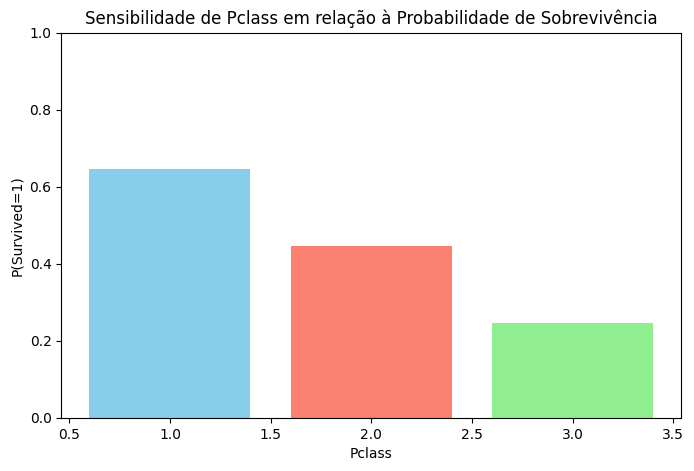

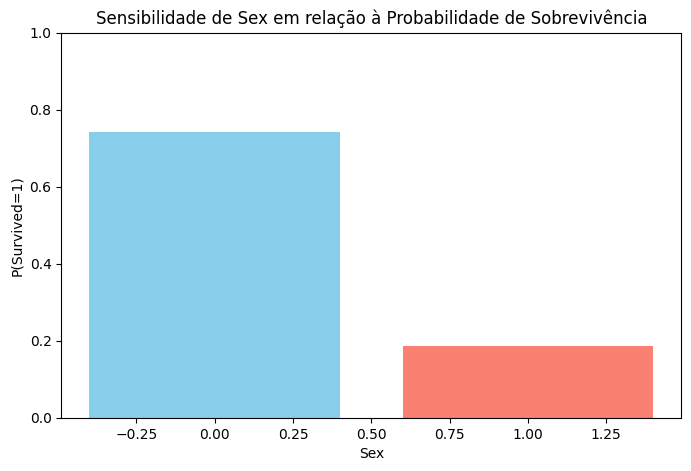

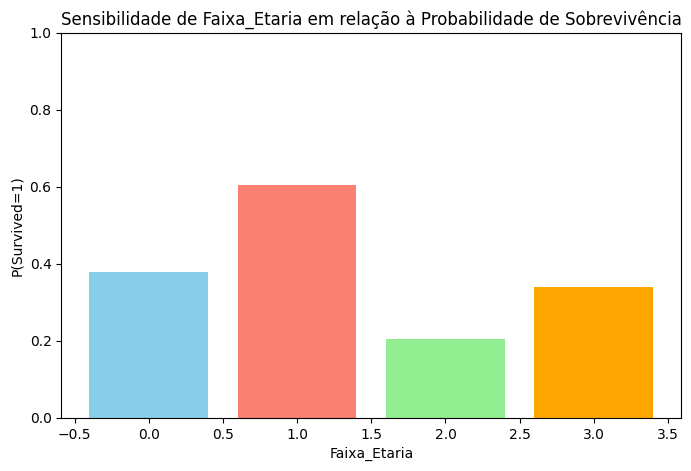

In [ ]:
import pandas as pd

# Configurar a inferência com a rede bayesiana treinada
inferencia = VariableElimination(rede_bayesiana)

# Função para calcular a sensibilidade de cada variável em relação a 'Survived'
def calcular_sensibilidade(rede, variavel_interesse, valores_variavel):
    sensibilidades = {}
    for valor in valores_variavel:
        evidencia = {variavel_interesse: valor}
        resultado = inferencia.query(variables=['Survived'], evidence=evidencia)
        sensibilidades[valor] = resultado.values[1]  # P(Survived=1) para o valor dado
    return sensibilidades

# Calcular as sensibilidades para cada variável
sensibilidade_pclass = calcular_sensibilidade(rede_bayesiana, 'Pclass', [1, 2, 3])
sensibilidade_sex = calcular_sensibilidade(rede_bayesiana, 'Sex', [0, 1])  # 0 para 'female', 1 para 'male'
sensibilidade_faixa_etaria = calcular_sensibilidade(rede_bayesiana, 'Faixa_Etaria', [0, 1, 2, 3])  # Ajuste conforme seus mapeamentos de idade

# Exibir os resultados
print("Sensibilidade Pclass:", sensibilidade_pclass)
print("Sensibilidade Sex:", sensibilidade_sex)
print("Sensibilidade Faixa_Etaria:", sensibilidade_faixa_etaria)

# Dados para o gráfico
sensibilidades = {
    'Pclass': sensibilidade_pclass,
    'Sex': sensibilidade_sex,
    'Faixa_Etaria': sensibilidade_faixa_etaria
}

# Plotar gráficos de barras para cada variável
for variavel, valores in sensibilidades.items():
    plt.figure(figsize=(8, 5))
    plt.bar(valores.keys(), valores.values(), color=['skyblue', 'salmon', 'lightgreen', 'orange'])
    plt.title(f'Sensibilidade de {variavel} em relação à Probabilidade de Sobrevivência')
    plt.xlabel(variavel)
    plt.ylabel('P(Survived=1)')
    plt.ylim(0, 1)
    plt.show()



## Plotando o gráfico de Curva ROC:

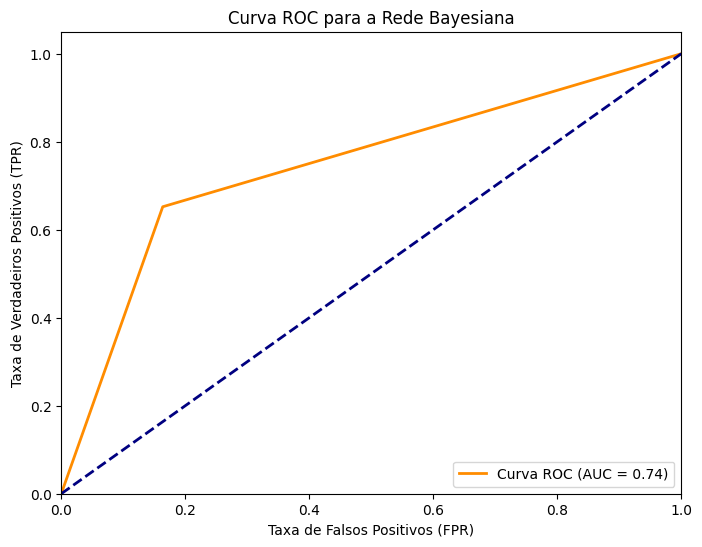

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular a Curva ROC e a AUC
fpr, tpr, thresholds = roc_curve(y_test_filtered, y_pred)
roc_auc = auc(fpr, tpr)

# Plotar a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC para a Rede Bayesiana')
plt.legend(loc="lower right")
plt.show()

## Calculando a estatística qui-quadrado, p-valor, grau de liberdade e frequências esperadas:

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Criar uma tabela de contingência entre Pclass, Sex e Survived
tabela_contingencia = pd.crosstab(index=[train_data['Pclass'], train_data['Sex']], columns=train_data['Survived'])

# Calcular o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela_contingencia)

# Exibir os resultados
print("Estatística Qui-Quadrado (χ²):", chi2)
print("p-valor:", p)
print("Grau de Liberdade:", dof)
print("Frequências Esperadas:\n", expected)


Estatística Qui-Quadrado (χ²): 285.43518398248625
p-valor: 1.3526140447740465e-59
Grau de Liberdade: 5
Frequências Esperadas:
 [[ 48.70926966  30.29073034]
 [ 56.7247191   35.2752809 ]
 [ 35.76123596  22.23876404]
 [ 56.7247191   35.2752809 ]
 [ 71.52247191  44.47752809]
 [169.55758427 105.44241573]]
